<a href="https://colab.research.google.com/github/Rauloigs/Mercados-Financieros-P-Eficiente/blob/main/bl_csv_portfolio_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import blpor as blpor
import p_ef as pef
import pandas as pd

### Obtener Retornos Equities & Market
- Un df de Equities (Últimos 3 años 02/28/2022 al 02/26/2025)
- Un Pandas Series de Market (Se utiliza después para calcular las betas).

In [ ]:
benchmark_returns = blpor.get_returns_spx()
asset_returns = blpor.get_returns_equities()
asset_returns.head(2)

,META,PLD,CVX,BA,ABT,AXP,DD,VZ,KO,NKE
2022-02-28,0.002610,-0.017670,0.025460,0.018977,-0.014731,0.004276,-0.009007,-0.008350,-0.009753,-0.016343
2022-03-01,-0.036383,-0.000617,0.038954,-0.052129,-0.020521,-0.088517,-0.022878,-0.001119,-0.004347,-0.032224


### Retornos
1. Retornos Promedio
2. Retornos CAPM
3. Análisis Estádistico y Supuestos de Normalidad

#### 1. Retornos Promedio
Obtenemos los retornos históricos de la serie.

In [ ]:
ex_rets_pue = blpor.annualize_rets(asset_returns, 252)
mean_rets = ex_rets_pue.to_frame(name='ER Mean') # to data frame
mean_rets

,ER Mean
META,0.328858
PLD,-0.101407
CVX,0.000644
BA,-0.111732
ABT,0.011755
AXP,0.107285
DD,-0.024057
VZ,-0.096470
KO,0.027584
NKE,-0.216525


#### 2. Retornos CAPM
- Betas:
  **(1) Betas Calculadas** Cálculo de acuerdo al SPX Index, últimos 3 años
  **(2)Betas Ajustadas Bloomberg** de acuerdo a la Terminal
- Risk Free Rate: Yield USGG3M Index (daily) de los últimos 3 años

A continuación observamos la diferencia entre las **Betas Calculadas** vs **Betas Ajustas de la Terminal - Bloomberg**

Existe una diferencia considerable (ver columna "Diferencia"), utilizaremos las Betas Ajustadas de Bloomberg

In [ ]:
betas_calculadas = blpor.get_betas(benchmark_returns, asset_returns)
betas_ajustadas_bloomberg = blpor.get_betas_bloomberg()
blpor.get_betas_bloomberg_vs_calculadas(betas_ajustadas_bloomberg, betas_calculadas)

,Beta (Calculada SPX Index),Beta Adj Bloomberg,Diferencia
META,1.632025,1.080,-33.82%
PLD,1.027164,1.176,14.49%
CVX,0.557418,0.699,25.40%
BA,1.083497,1.031,-4.85%
ABT,0.640486,0.620,-3.20%
AXP,1.163123,1.106,-4.91%
DD,0.980971,0.867,-11.62%
VZ,0.318825,0.618,93.84%
KO,0.384988,0.456,18.45%
NKE,1.141602,0.818,-28.35%


Aquí obtenemos el **RF** a partir de **USGG3M Index** durante el mismo periodo de los Retornos de los Activos

In [ ]:
usgg3m_rf = blpor.usgg3m_risk_free_rate()
print(f"Risk-free rate: {usgg3m_rf:.5%}")

Risk-free rate: 4.29701%


Finalmente con las **Betas Ajustadas de Bloomberg** calculamos el **ER CAPM**

In [ ]:
capm_rets = blpor.rets_capm_rfmanual(betas_ajustadas_bloomberg, benchmark_returns, risk_free_rate=usgg3m_rf, periods_per_year=252)
capm_rets

,ER CAPM
META,0.095906
PLD,0.100612
CVX,0.077232
BA,0.093505
ABT,0.073359
AXP,0.097181
DD,0.085466
VZ,0.073261
KO,0.065321
NKE,0.083064


Ahora comparamos los **Retornos Históricos vs Retornos CAPM**

In [ ]:
blpor.compare_mean_capm_returns(mean_rets, capm_rets)

alt.Chart(...)

#### 3. Análisis Estádistico y Supuestos de Normalidad

Análisis: Skewnnes, Kurtosis, VaR y Sharpe Ratio

In [ ]:
summary = pef.summary_stats(r=asset_returns, riskfree_rate=usgg3m_rf)
summary = summary.drop(['Annualized Return', 'Max Drawdown'], axis=True)
summary

,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio
META,0.456089,-0.307253,22.613822,0.036772,0.062602,0.601062
PLD,0.288157,-0.158497,5.252898,0.030081,0.042758,-0.480490
CVX,0.256045,-0.297824,5.657921,0.026853,0.038477,-0.158543
BA,0.366088,-0.424112,5.444304,0.039673,0.057391,-0.405260
ABT,0.216934,0.057280,5.609964,0.021381,0.030346,-0.138005
AXP,0.283755,-0.096199,6.364228,0.028090,0.040488,0.217329
DD,0.276513,-0.667570,13.451011,0.028062,0.039902,-0.232475
VZ,0.226660,-0.278463,8.261190,0.023364,0.035286,-0.589955
KO,0.159165,-0.585106,8.312827,0.016850,0.023172,-0.092716
NKE,0.353027,-1.615665,20.065850,0.038731,0.053402,-0.704898


Ahora obtenemos **QQ Plots** y **Box Plots** de cada activo

In [ ]:
blpor.generar_graficos_normalidad_altair(asset_returns)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

alt.HConcatChart(...)

### Riesgo
1. Matriz de Correlación
2. Volatilidad
3. Volatilidad vs Retorno CAPM
4. Drawdown
5. VaR

#### 1. Matriz de Correlación

In [ ]:
corr = asset_returns.corr()
corr_matrix = corr.style.map(blpor.color_negative_red)
corr_matrix

,META,PLD,CVX,BA,ABT,AXP,DD,VZ,KO,NKE
META,1.000000,0.277062,0.099784,0.288545,0.259458,0.388813,0.327062,0.085503,0.116194,0.333437
PLD,0.277062,1.000000,0.239208,0.373036,0.510292,0.458777,0.439296,0.271757,0.399502,0.376912
CVX,0.099784,0.239208,1.000000,0.209482,0.147673,0.279765,0.339436,0.180485,0.164541,0.214231
BA,0.288545,0.373036,0.209482,1.000000,0.278705,0.438475,0.393980,0.098523,0.183689,0.360921
ABT,0.259458,0.510292,0.147673,0.278705,1.000000,0.356797,0.356296,0.286415,0.457240,0.363861
AXP,0.388813,0.458777,0.279765,0.438475,0.356797,1.000000,0.510399,0.186512,0.264920,0.395140
DD,0.327062,0.439296,0.339436,0.393980,0.356296,0.510399,1.000000,0.193199,0.321273,0.419762
VZ,0.085503,0.271757,0.180485,0.098523,0.286415,0.186512,0.193199,1.000000,0.348130,0.180413
KO,0.116194,0.399502,0.164541,0.183689,0.457240,0.264920,0.321273,0.348130,1.000000,0.343108
NKE,0.333437,0.376912,0.214231,0.360921,0.363861,0.395140,0.419762,0.180413,0.343108,1.000000


#### 2. Volatilidad

In [ ]:
annual_vol = blpor.annualize_vol(asset_returns, 252)
annual_vol

,volatility
META,0.456089
PLD,0.288157
CVX,0.256045
BA,0.366088
ABT,0.216934
AXP,0.283755
DD,0.276513
VZ,0.226660
KO,0.159165
NKE,0.353027


In [ ]:
blpor.compare_capmrets_vol(annual_vol, capm_rets)

alt.Chart(...)

#### 3. Drawdown
Se crean dos librerías (1) Wealth Index y Peaks y (2) Drawdown para mostrar de cada activo:
1. **Max Drawdown**: Se despliega de cada Equity la máxima caída y su fecha (cuando)
2. **Wealth Index vs Peaks**: Se visualizan gráficamente 1,000 USD invertidos a lo largo de los 3 años con sus "Peaks"
3. **Drawdown**: Se observan las "caídas" durante estos 3 años

In [ ]:
wealth_peaks = blpor.wealth_peaks(asset_returns) # Obtener Wealth Index y Peaks de cada activo en Series
drawdown_equities = blpor.drawdown_equities(asset_returns) # Obtener Drawdown de cada activo en Series

In [ ]:
blpor.generar_dataframe_max_drawdown(drawdown_equities)

,Max Drawdown (%),Fecha Max Drawdown
ABT,-29.97,2023-10-12
AXP,-33.52,2022-09-30
BA,-50.58,2024-11-14
CVX,-29.82,2024-09-11
DD,-37.57,2022-09-26
KO,-22.59,2023-10-05
META,-67.10,2022-11-03
NKE,-58.76,2025-02-07
PLD,-47.78,2023-10-27
VZ,-46.73,2023-10-13


In [ ]:
chart_abt_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'ABT')
chart_abt_d = blpor.graficar_drawdown(drawdown_equities, 'ABT')
chart_abt_wp.display()
chart_abt_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_axp_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'AXP')
chart_axp_d = blpor.graficar_drawdown(drawdown_equities, 'AXP')
chart_axp_wp.display()
chart_axp_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_ba_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'BA')
chart_ba_d = blpor.graficar_drawdown(drawdown_equities, 'BA')
chart_ba_wp.display()
chart_ba_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_cvx_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'CVX')
chart_cvx_d = blpor.graficar_drawdown(drawdown_equities, 'CVX')
chart_cvx_wp.display()
chart_cvx_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_dd_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'DD')
chart_dd_d = blpor.graficar_drawdown(drawdown_equities, 'DD')
chart_dd_wp.display()
chart_dd_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_ko_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'KO')
chart_ko_d = blpor.graficar_drawdown(drawdown_equities, 'KO')
chart_ko_wp.display()
chart_ko_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_meta_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'META')
chart_meta_d = blpor.graficar_drawdown(drawdown_equities, 'META')
chart_meta_wp.display()
chart_meta_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_nke_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'NKE')
chart_nke_d = blpor.graficar_drawdown(drawdown_equities, 'NKE')
chart_nke_wp.display()
chart_nke_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_pld_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'PLD')
chart_pld_d = blpor.graficar_drawdown(drawdown_equities, 'PLD')
chart_pld_wp.display()
chart_pld_d.display()

alt.Chart(...)

alt.Chart(...)

In [ ]:
chart_vz_wp = blpor.graficar_wealth_peaks(wealth_peaks, 'VZ')
chart_vz_d = blpor.graficar_drawdown(drawdown_equities, 'VZ')
chart_vz_wp.display()
chart_vz_d.display()

alt.Chart(...)

alt.Chart(...)

#### 4. VaR & VaR Gaussian
- **VaR Gaussian**: Asume que los rendimientos de los activos tienen una distribución normal.
-  Se asume un intervalo de confianza del 5%
- Entre más diferencia exista, menos se ajustan los retornos a una distribución normal.
- Si el **VaR histórico** es mayor que el **VaR gaussiano** podría indicar que los rendimientos de esos activos tienen "colas pesadas", lo que significa que hay una mayor probabilidad de eventos extremos de lo que predice la distribución normal.
- **Interpretación**. Por ejemplo para ABT:
**VaR Gaussiano (2.13)**:Esto significa que, según el modelo gaussiano, existe un 5% de probabilidad de que la pérdida en el activo ABT supere el 2.13% en **un día**.
**VaR Histórico (2.07)**:
Esto significa que, según los datos históricos, el 5% de los peores rendimientos del activo ABT resultaron en una pérdida del 2.07% o más **en un día**.

In [ ]:
var = pd.Series(blpor.var_historic(asset_returns, level=5)*100, name='VaR')
var_gaussian = pd.Series(blpor.var_gaussian(asset_returns, modified=True)*100, name='VaR')
var = pd.DataFrame(var)
var_gaus = pd.DataFrame(var_gaussian)

In [ ]:
blpor.compare_var_vargaus(var, var_gaus)

alt.Chart(...)

### Portafolio Eficiente
1. Frontera Eficiente.
2. Portafolio de mínima varianza (sin restricciones)
3. Portafolio de mínima varianza con Restricciones (1) no ventas en corto y (2) invertir mínimo el 2% en cada uno de los 10 activos. Con esta última queremos asegurar que tendremos exposición a todas las correlaciones existentes por este portafolio de 10 activos.

#### 1. Frontera Eficiente
Es importante notar que el máximo retorno que podemos generar con nuestro portafolio es de 10.10% esto se observa en donde termina la curva justo donde la esta el activo PLD

In [ ]:
cov = asset_returns.cov()*252 # Obtener la matriz de covarianza
er =  capm_rets['ER CAPM'] # convertir capm rets a p.series

- **Portafolio de Mínima Varianza (gmv)**: azul,
- **Portafolio Equally Weighted (ew)**: amarillo
- **Portafolio de Tangencia**: morado

<Axes: xlabel='Volatility'>

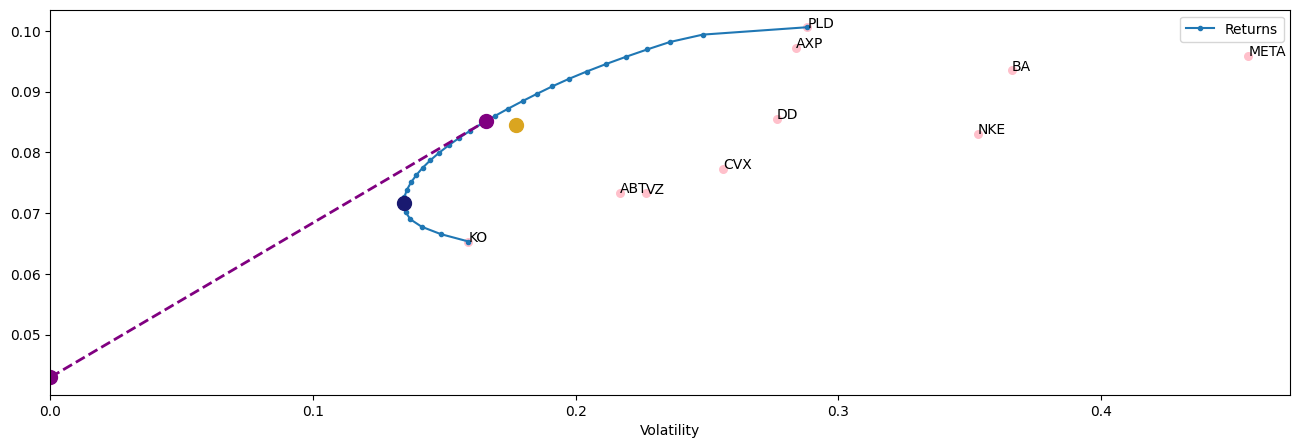

In [ ]:
blpor.plot_rigs_ef(rets_p=asset_returns, n_points=30, er=er, cov=cov,
                   show_cml=True, show_p=True, style='.-', riskfree_rate=usgg3m_rf, show_ew=True, show_gmv=True)

Este de aquí abajo es solo un intento de mejorar las visualizaciones del gráfico anterior. Sigue en proceso.

In [ ]:
blpor.plot_rigs_ef_altair_test(rets_p=asset_returns, n_points=30, er=er, cov=cov,
                   show_cml=True, show_p=True, riskfree_rate=usgg3m_rf, show_ew=True, show_gmv=True)

alt.LayerChart(...)

- Aquí introducimos manualmente el **retorno esperado** que queremos de nuestro portafolio. Dado el gráfico anterior podemos observar que el máximo retorno que podemos introducir sería hasta 10.101%. Entonces podremos configurar diferentes portafolio de 0% a 10.10%
- Para este caso **utilizaremos el portafolio de mínima varianza (gmv)** que tiene un retorno esperado de aproximadamente **7.17%**. Este portafolio nos da una **mínima varianza de 13.45%**
- **Mostramos los pesos necesarios** (sin restricciones) para lograr este portafolio.
- Dado que no contamos con retornos negativos **no contamos con ventas en corto**, aún sin estar construyendo la resticción wi>=0

#### 2. Portafolio de Mínima Varianza

In [ ]:
blpor.get_minima_varianza_portafolio(er=er, cov=cov)

Introducir el Retorno Esperado del Portafolio:
 0.0717


Retorno Esperado: 7.199999999999999 %

Holding Portafolio de Mínima Varianza: 13.45 %

Pesos para obtener un retorno de 7.199999999999999 %:



,secs,weights %
0,ABT,3.0
1,AXP,0.0
2,BA,17.0
3,CVX,2.0
4,DD,10.0
5,KO,3.0
6,META,0.0
7,NKE,15.0
8,PLD,50.0
9,VZ,0.0


#### 3. Portafolio de Mínima Varianza con Restricciones
- Tenemos que inrtroducir el retorno esperado, en este caso **7.17%** que corresponde al portafolio **gmv**. Así podemos comparar las restircciones vs el portafolio anterior (**Mínima varianza**) pero ahora con pesos.
- Obtenemos los pesos en cada uno de los activos garantizando exposición a la correlación de cada activo. Y observamos que **la varianza incremento 19 puntos base** a comparación del portafolio anterior.
- No hay ventas en corto

In [ ]:
blpor.get_minima_varianza_portafolio_2pct(er=er, cov=cov)

Introducir el Retorno Esperado del Portafolio:
 0.0717


Retorno Esperado: 7.199999999999999 %

Holding Portafolio Varianza: 13.64 %

Pesos para obtener un retorno de 7.199999999999999 %:



,secs,weights %
0,ABT,2.00
1,AXP,2.00
2,BA,13.36
3,CVX,2.00
4,DD,5.88
5,KO,2.00
6,META,2.00
7,NKE,13.07
8,PLD,55.68
9,VZ,2.00
